In [144]:
import pandas as pd
import numpy as np

# 1. Loading Data

In [77]:
emotions_df = pd.read_csv("./datasets/emotions/text.csv")
emotions_df.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [78]:
violence_df = pd.read_csv("datasets/gender_violence/train.csv")
violence_df.head()

,Tweet_ID,tweet,type
0,ID_0022DWKP,Had a dream i got raped last night. By a guy i...,sexual_violence
1,ID_00395QYM,he thought the word raped means sex and told m...,sexual_violence
2,ID_003EOSSF,She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...,sexual_violence
3,ID_004BBHOD,I was sexually abused for 3 years at age 4 to ...,sexual_violence
4,ID_004F7516,Chessy Prout can do better by telling the trut...,sexual_violence


In [79]:
hate_df = pd.read_csv("datasets/Hate_speech/labeled_data.csv")
hate_df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


# 2. Data Preprocessing

In [80]:
emotions_df.drop(columns='Unnamed: 0', inplace=True)
violence_df.drop(columns='Tweet_ID', inplace=True)
hate_df.drop(columns=['Unnamed: 0','count',	'hate_speech',	'offensive_language',	'neither'], inplace=True)

In [81]:
emotions_df.head()

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


In [82]:
violence_df.head()

,tweet,type
0,Had a dream i got raped last night. By a guy i...,sexual_violence
1,he thought the word raped means sex and told m...,sexual_violence
2,She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...,sexual_violence
3,I was sexually abused for 3 years at age 4 to ...,sexual_violence
4,Chessy Prout can do better by telling the trut...,sexual_violence


In [83]:
hate_df.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


# Renaming Columns

In [84]:
violence_df.rename(columns={'tweet':'text','type':'label'},inplace=True)
hate_df.rename(columns={'tweet':'text','class':'label'},inplace=True)

In [85]:
hate_df.columns, violence_df.columns,emotions_df.columns

(Index(['label', 'text'], dtype='object'),
 Index(['text', 'label'], dtype='object'),
 Index(['text', 'label'], dtype='object'))

# Checking Null Values

In [86]:
emotions_df.isna().sum()

text     0
label    0
dtype: int64

In [87]:
violence_df.isna().sum()

text     0
label    0
dtype: int64

In [88]:
hate_df.isna().sum()

label    0
text     0
dtype: int64

In [89]:
emotions_df.shape, violence_df.shape,hate_df.shape

((416809, 2), (39650, 2), (24783, 2))

In [90]:
emotions_df.groupby('label').count()

,text
label,
0,121187
1,141067
2,34554
3,57317
4,47712
5,14972


In [91]:
emotions_df[emotions_df.label==0].sample(12000)

,text,label
135871,i personally would prefer a shorter life fille...,0
145940,i feel it should be ignored totally,0
382603,i had the sensation of vomiting dizziness and ...,0
171636,i know that when i eat horribly i feel horrible,0
296149,i feel like i missed a big opportunity but at ...,0
...,...,...
187392,i feel disappointed disappointed in myself tha...,0
252361,i am frustrated because i feel so rotten and t...,0
42221,i was feeling so crappy on my birthday is that...,0
250581,ive decided that i have nothing to feel regret...,0


# Extract Sample from emotions Dataset

In [92]:
e_df = pd.DataFrame()
for i in range(0,6):
    sample_df = emotions_df[emotions_df.label==i].sample(n=2000,random_state=42)
    e_df = pd.concat([e_df,sample_df])

In [93]:
e_df.groupby('label').count()

,text
label,
0,2000
1,2000
2,2000
3,2000
4,2000
5,2000


In [94]:
emotions_df = e_df.copy()
emotions_df.shape

(12000, 2)

In [95]:
violence_df.groupby('label').count()

,text
label,
Harmful_Traditional_practice,188
Physical_violence,5946
economic_violence,217
emotional_violence,651
sexual_violence,32648


In [96]:
12000-violence_df[violence_df.label!='sexual_violence'].shape[0]

4998

# Extract Sample from violence Dataset

In [97]:
sexual_v = violence_df[violence_df.label=='sexual_violence'].sample(4998,random_state=42)
sample_v_df = violence_df[violence_df.label!='sexual_violence']
v_df = pd.concat([sample_v_df,sexual_v])
violence_df = v_df.copy()
violence_df.shape

(12000, 2)

In [98]:
violence_df.groupby('label').count()

,text
label,
Harmful_Traditional_practice,188
Physical_violence,5946
economic_violence,217
emotional_violence,651
sexual_violence,4998


# Extract Sample from hate Dataset

In [99]:
hate_df.groupby('label').count()

,text
label,
0,1430
1,19190
2,4163


In [100]:
12000-hate_df[hate_df.label!=1].shape[0]

6407

In [101]:
zero_hDf = hate_df[hate_df.label==1].sample(6407,random_state=42)
sample_h_df = hate_df[hate_df.label!=1]
h_df = pd.concat([sample_h_df,zero_hDf])
hate_df = h_df.copy()
hate_df.shape

(12000, 2)

In [105]:
hate_df.groupby('label').count()

,text
label,
0,1430
1,6407
2,4163


In [106]:
hate_df.shape, violence_df.shape,emotions_df.shape

((12000, 2), (12000, 2), (12000, 2))

In [108]:
hate_df.sample(3)

,label,text
23054,1,Y'all weird on here. Fake hoes for attention
1986,2,&#9733;@&#9733;@&#9733;@&#9733;@&#9733; GRAND ...
6292,1,@jqualley_ @_BeautifulKeezy bitch YESSSSS I ma...


In [109]:
violence_df.sample(3)

,text,label
6928,From the person who told me. He says the fell...,sexual_violence
13773,Happy Birthday to my husband The most lovely ...,Physical_violence
11697,What are some things that make you really happ...,Physical_violence


In [110]:
emotions_df.sample(3)

,text,label
166413,i said i feel resentful that my childhood was ...,3
180277,i have been busy but i feel that my loyal read...,2
377736,i do these cards once in a while is that i fee...,1


# Replace Indexes

In [111]:
hate_df.reset_index(drop=True,inplace=True)
emotions_df.reset_index(drop=True,inplace=True)
violence_df.reset_index(drop=True,inplace=True)

In [112]:
hate_df.sample(3)

,label,text
8214,1,Another bad bitch fuck her for a hour another ...
1118,2,@SalaciousSully hopefully not back in da ghetto?
3925,0,RT @PacDaGoat: I really hate attention seeking...


In [113]:
violence_df.sample(3)

,text,label
1867,My Wife Beats Me Too Much – Husband Cries Out ...,Physical_violence
1544,The day my husband beats me. The day he is rea...,Physical_violence
8735,🇺🇸: He Broke Up with me 🇮🇳: He Raped Me,sexual_violence


In [114]:
emotions_df.sample(3)

,text,label
10754,i feel like i ve got some weird self inflicted...,5
9568,i feel more like i m an intruder or robber and...,4
9666,i have noticed that it is okay to feel unsure ...,4


# 3.Label Encoding

In [116]:
from sklearn.preprocessing import LabelEncoder

In [117]:
l_encoder = LabelEncoder()
violence_df['label']=l_encoder.fit_transform(violence_df['label'])
violence_df.head()

,text,label
0,"My Husband Beats Me Frequently, Wife Tells Cou...",1
1,"Best thing for me to do, is remain silent when...",1
2,"My husband will never beat me, Bambam denies r...",1
3,"theyre like, i just wanna be a baby maker with...",1
4,"I was in England for a week, the longest I’ve ...",1


In [118]:
violence_df.groupby('label').count()

,text
label,
0,188
1,5946
2,217
3,651
4,4998


# 4. Stopword Removal

In [119]:
import spacy


In [120]:
from spacy.lang.en.stop_words import STOP_WORDS

In [122]:
len(STOP_WORDS)

326

In [123]:
nlp = spacy.load("en_core_web_sm")

In [124]:
def removeStop(sent):
    doc = nlp(sent)
    j = []
    for token in doc:
        if not token.is_stop:
            j.append(token.text)

    return " ".join(j);

In [128]:
removeStop("We jUst open our wings")

'open wings'

In [130]:
emotions_df['text']=emotions_df['text'].apply(removeStop)
violence_df['text']=violence_df['text'].apply(removeStop)
hate_df['text']=hate_df['text'].apply(removeStop)

In [132]:
violence_df['text'].head()

0      Husband Beats Frequently , Wife Tells Court |  
1    Best thing , remain silent return work today ....
2    husband beat , Bambam denies rumour TeddyA bea...
3    like , wanna baby maker zero sexual autonomy ,...
4    England week , longest away . husband said soo...
Name: text, dtype: object

# 5. Tokenization and Padding

In [133]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [134]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(pd.concat([emotions_df['text'],violence_df['text'],hate_df['text']]))

In [135]:
emotion_sequence = tokenizer.texts_to_sequences(emotions_df['text'])
violence_sequence = tokenizer.texts_to_sequences(violence_df['text'])
hate_sequence = tokenizer.texts_to_sequences(hate_df['text'])

In [139]:
emotions_df['text'].iloc[1]

'feel crappy upset situation nt help'

In [140]:
emotion_sequence[1:2]

[[1, 1686, 827, 475, 11, 65]]

In [141]:
max_padding = 50
emotion_padded = pad_sequences(emotion_sequence,maxlen=max_padding,padding='post')
violence_padded = pad_sequences(violence_sequence,maxlen=max_padding,padding='post')
hate_padded = pad_sequences(hate_sequence,maxlen=max_padding,padding='post')

In [142]:
emotion_padded[2]

array([    1,     5,   257, 11753,  1098,   346,   990,   310,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0], dtype=int32)

In [143]:
emotion_sequence[2]

[1, 5, 257, 11753, 1098, 346, 990, 310]

In [145]:
emotion_labels = np.array(emotions_df['label'])
violence_labels = np.array(violence_df['label'])
hate_labels = np.array(hate_df['label'])

In [148]:
hate_labels

array([2, 2, 2, ..., 1, 1, 1])

# 6. Model Building

In [149]:
emotion_input = emotion_padded
hate_input = hate_padded
violence_input = violence_padded

In [151]:
from tensorflow import keras

In [152]:
# defining multiple input layers

emotion_df_input = keras.layers.Input(shape=(max_padding,),name='emotion_input')
violence_df_input = keras.layers.Input(shape=(max_padding,),name='violence_input')
hate_df_input = keras.layers.Input(shape=(max_padding,),name='hate_input')

In [153]:
# Use a sgared embedding layer
embedding_layer = keras.layers.Embedding(input_dim=len(tokenizer.word_index)+1,output_dim=128)

In [154]:
#Apply the embedding layer to each input
emotion_embedding = embedding_layer(emotion_df_input)
hate_embedding = embedding_layer(hate_df_input)
violence_embedding = embedding_layer(violence_df_input)

In [155]:
# shared LSTM layer
shared_lstm = keras.layers.LSTM(64,return_sequences=True)

In [156]:
emotion_lstm = shared_lstm(emotion_embedding)
violence_lstm = shared_lstm(violence_embedding)
hate_lstm = shared_lstm(hate_embedding)

In [157]:
# Shared global average pooling layer and dropout layer
shared_pooling = keras.layers.GlobalAveragePooling1D()
shared_dropout = keras.layers.Dropout(0.5)

In [158]:
emotion_features = shared_dropout(shared_pooling(emotion_lstm))
hate_features = shared_dropout(shared_pooling(hate_lstm))
violence_features = shared_dropout(shared_pooling(violence_lstm))

In [160]:
emotions_df['label'].unique(),hate_df['label'].unique(),violence_df['label'].unique()

(array([0, 1, 2, 3, 4, 5]), array([2, 0, 1]), array([1, 3, 0, 2, 4]))

In [161]:
#output layers
emotion_output = keras.layers.Dense(6, activation='softmax',name='emotion_output')(emotion_features)
hate_output = keras.layers.Dense(3,activation='softmax',name='hate_output')(hate_features)
violence_output = keras.layers.Dense(5,activation='softmax',name='violence_output')(violence_features)

In [163]:
#Combine all the layers(build the model)
model = keras.models.Model(
    inputs=[emotion_df_input,violence_df_input,hate_df_input],
    outputs=[emotion_output,violence_output,hate_output]
)

In [168]:
model.compile(optimizer='adam',
    loss={
    'emotion_output':'sparse_categorical_crossentropy',
    'violence_output':'sparse_categorical_crossentropy',
    'hate_output':'sparse_categorical_crossentropy'
    }, 
    metrics={
    'emotion_output':'accuracy',
    'violence_output':'accuracy',
    'hate_output':'accuracy'
    }

)

In [169]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ emotion_input       │ (None, 50)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ violence_input      │ (None, 50)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hate_input          │ (None, 50)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 50, 128)   │  5,228,672 │ emotion_input[0]… │
│ (Embedding)         │                   │            │ hate_input[0][0], │
│                     │                   │            │ violence_input[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 50, 64)    │     49,408 │ embedding[0][0],  │
│                     │                   │            │ embedding[2][0],  │
│                     │                   │            │ embedding[1][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 64)        │          0 │ lstm[0][0],       │
│ (GlobalAveragePool… │                   │            │ lstm[2][0],       │
│                     │                   │            │ lstm[1][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 64)        │          0 │ global_average_p… │
│                     │                   │            │ global_average_p… │
│                     │                   │            │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ emotion_output      │ (None, 6)         │        390 │ dropout[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ violence_output     │ (None, 5)         │        325 │ dropout[2][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hate_output (Dense) │ (None, 3)         │        195 │ dropout[1][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 5,278,990 (20.14 MB)

 Trainable params: 5,278,990 (20.14 MB)

 Non-trainable params: 0 (0.00 B)

In [170]:
model.fit(x={
    'emotion_input':emotion_input,
    'violence_input':violence_input,
    'hate_input':hate_input,
},
         y={
    'emotion_output':emotion_labels,
    'violence_output':violence_labels,
    'hate_output':hate_labels,
         },
         epochs=10,
         batch_size=4)

Epoch 1/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 122s 39ms/step - emotion_output_accuracy: 0.3939 - emotion_output_loss: 1.4354 - hate_output_accuracy: 0.7619 - hate_output_loss: 0.6337 - loss: 2.3161 - violence_output_accuracy: 0.9212 - violence_output_loss: 0.2470
Epoch 2/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 122s 41ms/step - emotion_output_accuracy: 0.8297 - emotion_output_loss: 0.5307 - hate_output_accuracy: 0.8770 - hate_output_loss: 0.3745 - loss: 0.9536 - violence_output_accuracy: 0.9849 - violence_output_loss: 0.0484
Epoch 3/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 121s 40ms/step - emotion_output_accuracy: 0.9351 - emotion_output_loss: 0.2248 - hate_output_accuracy: 0.9303 - hate_output_loss: 0.2176 - loss: 0.4558 - violence_output_accuracy: 0.9967 - violence_output_loss: 0.0134
Epoch 4/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 125s 42ms/step - emotion_output_accuracy: 0.9564 - emotion_output_loss: 0.1359 - hate_output_accuracy: 0.9627 - hate_output_loss: 0.1146 - loss: 0.2588 - violence_output_accuracy

# 7. Prediction and Evaluation

In [172]:
prediction = model.predict({
    'emotion_input':emotion_input,
    'violence_input':violence_input,
    'hate_input':hate_input,
},)

375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step


In [181]:
emotions_preds = np.argmax(prediction[0], axis=1)
violence_preds = np.argmax(prediction[1], axis=1)
hate_preds = np.argmax(prediction[2], axis=1)

In [183]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [184]:
violence_df['label'].unique()

array([1, 3, 0, 2, 4])

In [190]:
 def plot_cm(true,pred,title,labels):
     cf = confusion_matrix(true, pred, normalize='true')
     plt.figure(figsize=(7,6))
     sns.heatmap(cf, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)
     plt.title(title)
     plt.ylabel('Actual')
     plt.xlabel('Predicted')

emotion_label_text = ['sadness','joy', 'love','anger','fear','surprise']
violence_label_text = ['sexual_violence','physical_violence','emotion_violence','Harmgul_traditional_practices','economic_violences']
hate_label_text = ['offencive_speech','Neither','Hate_speech']

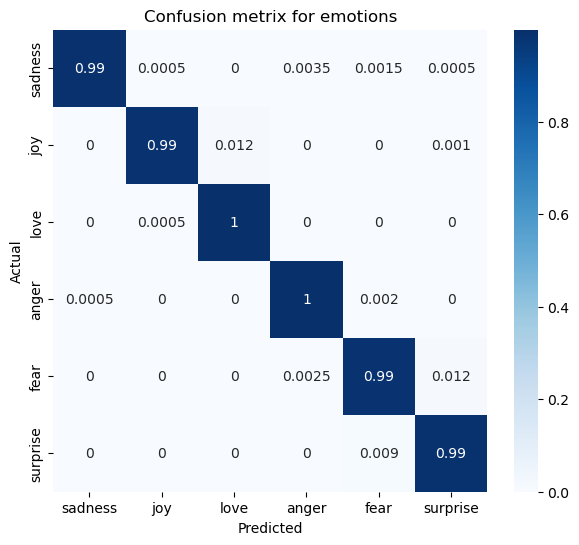

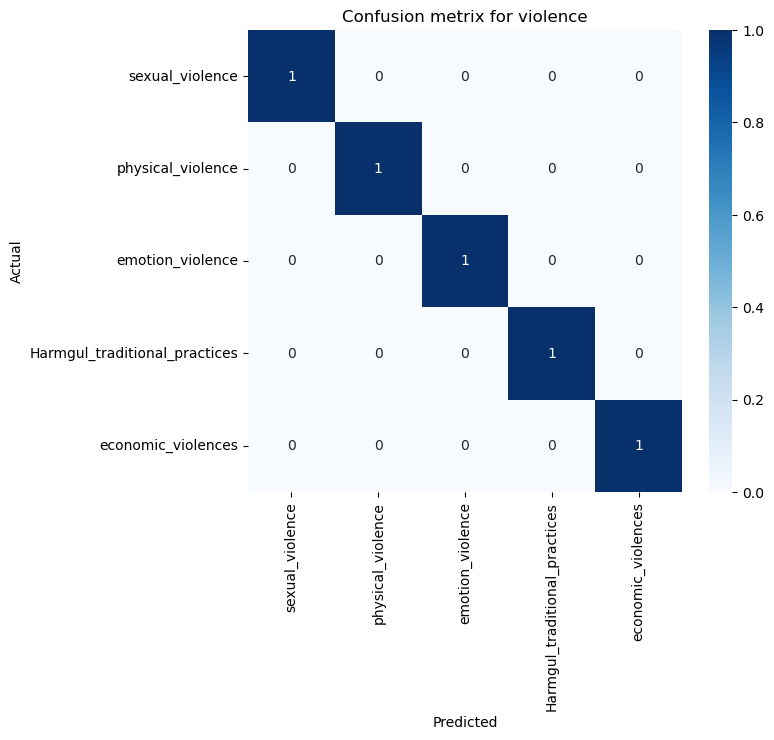

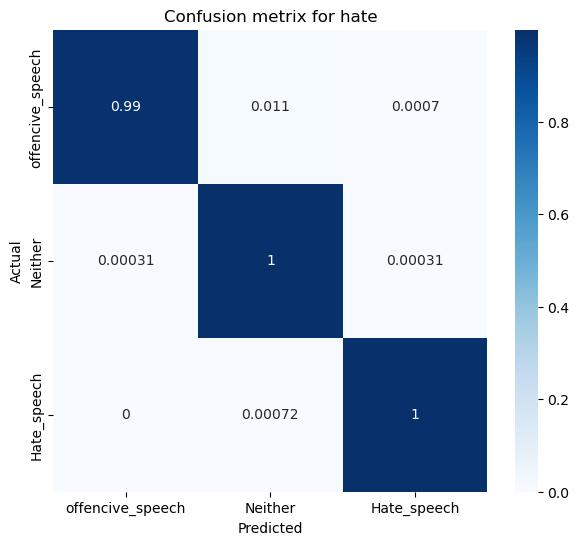

In [192]:
plot_cm(emotion_labels,emotions_preds,"Confusion metrix for emotions",emotion_label_text)
plot_cm(violence_labels,violence_preds,"Confusion metrix for violence",violence_label_text)
plot_cm(hate_labels,hate_preds,"Confusion metrix for hate",hate_label_text)

# 8. Manual Testing

In [211]:
def classify_text(input_text):
    #pre processing
    input_text_cleaned = removeStop(input_text)
    input_tokenized = tokenizer.texts_to_sequences([input_text_cleaned])
    input_padded = pad_sequences(input_tokenized,maxlen=max_padding,padding='post')

    #Prediction
    input_prediction = model.predict({
    'emotion_input':input_padded,
    'violence_input':input_padded,
    'hate_input':input_padded,
        },)

    emotions_preds = np.argmax(input_prediction[0], axis=1)[0]
    violence_preds = np.argmax(input_prediction[1], axis=1)[0]
    hate_preds = np.argmax(input_prediction[2], axis=1)[0]

    #determine major label

    major_labels = ['Emotion','Violence','Hate']
    major_label_index = np.argmax([np.max(input_prediction[0]),np.max(input_prediction[1]),np.max(input_prediction[2])])
    major_labels_pred = major_labels[major_label_index]

    #determine sub- labels

    emotion_label_text = ['anger','fear','joy', 'love','sadness','surprise']
    violence_label_text = ['sexual_violence','physical_violence','emotion_violence','Harmgul_traditional_practices','economic_violences']
    hate_label_text = ['offencive_speech','Neither','Hate_speech']

    if major_labels_pred == 'Emotion':
        sub_label = emotion_label_text[emotions_preds]

    elif major_labels_pred == 'Violence':
        sub_label = violence_label_text[violence_preds]
    else:
        sub_label = hate_label_text[hate_preds]
    

    return major_labels_pred, sub_label

In [212]:
classify_text("It is a beautiful day")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


('Hate', 'Hate_speech')

In [208]:
def classify_text2(input_text):
    # --- 1️⃣ Clean text ---
    input_text_cleaned = removeStop(input_text)

    # --- 2️⃣ Tokenize properly (as list, not string) ---
    input_tokenized = tokenizer.texts_to_sequences([input_text_cleaned])
    input_padded = pad_sequences(input_tokenized, maxlen=max_padding, padding='post')

    # --- 3️⃣ Run predictions for each output branch ---
    emotion_pred, violence_pred, hate_pred = model.predict({
        'emotion_input': input_padded,
        'violence_input': input_padded,
        'hate_input': input_padded
    })

    # --- 4️⃣ Convert predicted indices to labels ---
    emotion_idx = np.argmax(emotion_pred, axis=1)[0]
    violence_idx = np.argmax(violence_pred, axis=1)[0]
    hate_idx = np.argmax(hate_pred, axis=1)[0]

    # --- 5️⃣ Define consistent label names ---
    emotion_labels = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
    violence_labels = ['Harmful_Traditional_practice', 'Physical_violence',
                       'economic_violence', 'emotional_violence', 'sexual_violence']
    hate_labels = ['offensive_speech', 'Neither', 'Hate_speech']

    # --- 6️⃣ Print all predictions ---
    print(f"\n--- Prediction Summary for: '{input_text}' ---")
    print(f"Emotion → {emotion_labels[emotion_idx]} ({np.max(emotion_pred)*100:.2f}% confidence)")
    print(f"Violence → {violence_labels[violence_idx]} ({np.max(violence_pred)*100:.2f}% confidence)")
    print(f"Hate Speech → {hate_labels[hate_idx]} ({np.max(hate_pred)*100:.2f}% confidence)")

    # --- 7️⃣ Select most likely category overall ---
    top_confidences = [np.max(emotion_pred), np.max(violence_pred), np.max(hate_pred)]
    major_index = np.argmax(top_confidences)
    main_categories = ['Emotion', 'Violence', 'Hate']

    if major_index == 0:
        sub_label = emotion_labels[emotion_idx]
    elif major_index == 1:
        sub_label = violence_labels[violence_idx]
    else:
        sub_label = hate_labels[hate_idx]

    return main_categories[major_index], sub_label


In [210]:
classify_text2("It is a beautiful day")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step

--- Prediction Summary for: 'It is a beautiful day' ---
Emotion → fear (39.20% confidence)
Violence → sexual_violence (46.40% confidence)
Hate Speech → Hate_speech (65.63% confidence)


('Hate', 'Hate_speech')